In [2]:
#import data manipulation libraries
import pandas as pd
import numpy as np

#import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#import filter warning libraries
import warnings
warnings.filterwarnings('ignore')

#Import loggings
import logging
logging.basicConfig(level = logging.INFO,
                    format = '%(asctime)s - %(levelname)s - %(message)s',
                    filemode = 'w',
                    filename = 'model.log', force = True)

#Import Sci-kit Learn Libraries for model building
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler #overfit,outlier,imbalance data-robust(imblearn)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
url = 'https://raw.githubusercontent.com/anirudhakolay/Life_Expectancy_Analysis/refs/heads/main/Life%20Expectancy%20Data.csv'
df = pd.read_csv(url)
df.sample(frac = 1) 

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
987,Georgia,2006,Developing,73.9,126.0,1,6.18,110.113829,84.0,334,...,89.0,8.39,88.0,0.1,1872.684160,4136.0,2.7,2.9,0.714,12.6
488,Cameroon,2007,Developing,53.6,395.0,57,5.44,7.562893,82.0,100,...,81.0,4.76,82.0,7.0,111.711860,18395389.0,6.6,6.6,0.456,8.0
1818,Nepal,2010,Developing,68.0,178.0,23,0.24,84.623025,82.0,190,...,83.0,6.43,82.0,0.2,592.183522,2723137.0,16.7,17.2,0.515,11.1
1807,Namibia,2004,Developing,54.7,483.0,3,4.80,368.284826,NaN,4,...,81.0,6.47,81.0,24.0,3288.257373,29228.0,13.7,13.7,0.559,11.7
479,Cambodia,2000,Developing,57.7,274.0,27,1.51,0.328418,NaN,12237,...,62.0,5.87,59.0,2.1,3.685949,12152354.0,11.6,11.9,0.401,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,Bosnia and Herzegovina,2002,Developing,75.4,11.0,0,3.84,151.139930,NaN,28,...,86.0,7.10,8.0,0.1,1761.537647,377587.0,3.1,3.1,0.000,11.9
1218,Iran (Islamic Republic of),2015,Developing,75.5,83.0,18,NaN,0.000000,98.0,615,...,98.0,NaN,98.0,0.1,NaN,NaN,8.5,8.6,0.774,14.8
2728,Uganda,2001,Developing,47.7,539.0,115,10.57,26.976252,NaN,48543,...,56.0,7.26,55.0,10.8,234.984775,24854892.0,6.9,6.9,0.396,10.8
1477,Lesotho,2012,Developing,52.2,513.0,4,0.01,168.134899,95.0,179,...,93.0,11.14,95.0,9.0,1281.516000,289928.0,6.4,6.2,0.479,11.0


In [4]:
#Checking dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

<Axes: >

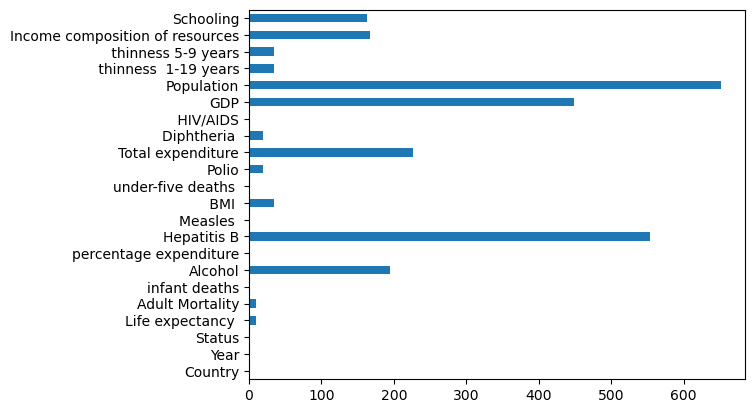

In [5]:
#Checking Null Values stats using Graphical method
df.isnull().sum().plot(kind = 'barh')

In [6]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:
#Evaluate Descriptive stats: EDA

# Step 1: Sagregate Categorical columns nd Numerical
categorical_col = df.select_dtypes(include = 'object')
numerical_col = df.select_dtypes(include = ['int64','float64']) #or exclude = 'object'

In [8]:
# Exploratory Data Analysis
# Univariate Analysis

stats = []

from collections import OrderedDict

for i in numerical_col.columns:
    numerical_stats = OrderedDict({
        'Feauture' : i,
        'Count' : df[i].count(),
        'Mean' : df[i].mean(),
        'Median' : df[i].median(),
        'Mode' : df[i].mode()[0],
        'Minimum' : df[i].min(),
        'Maximum' : df[i].max(),
        'Q1' : df[i].quantile(0.25),
        'Q3' : df[i].quantile(0.75),
        'IQR' : df[i].quantile(0.75) - df[i].quantile(0.25), #IQR cannot be 0
        'Std' : df[i].std(),
        'skewness' : df[i].skew(), #positive skewness (right skew), negative skewness (left skew), and zero skewness (symmetrical distribution, i.e. normal data)
        'kurtosis' : df[i].kurtosis(), # mesokurtic, leptokurtic, and platykurtic.
        'Variance' : df[i].var(), #spread of data
        'Standard Deviation' : df[i].std() # distance between mean and data point, under root variance
    })

    stats.append(numerical_stats)
    report = pd.DataFrame(stats)
report

,Feauture,Count,Mean,Median,Mode,Minimum,Maximum,Q1,Q3,IQR,Std,skewness,kurtosis,Variance,Standard Deviation
0,Year,2938,2.007519e+03,2.008000e+03,2013.00000,2000.00000,2.015000e+03,2004.000000,2.012000e+03,8.000000e+00,4.613841e+00,-0.006409,-1.213722,2.128753e+01,4.613841e+00
1,Life expectancy,2928,6.922493e+01,7.210000e+01,73.00000,36.30000,8.900000e+01,63.100000,7.570000e+01,1.260000e+01,9.523867e+00,-0.638605,-0.234477,9.070405e+01,9.523867e+00
2,Adult Mortality,2928,1.647964e+02,1.440000e+02,12.00000,1.00000,7.230000e+02,74.000000,2.280000e+02,1.540000e+02,1.242921e+02,1.174369,1.748860,1.544852e+04,1.242921e+02
3,infant deaths,2938,3.030395e+01,3.000000e+00,0.00000,0.00000,1.800000e+03,0.000000,2.200000e+01,2.200000e+01,1.179265e+02,9.786963,116.042756,1.390666e+04,1.179265e+02
4,Alcohol,2744,4.602861e+00,3.755000e+00,0.01000,0.01000,1.787000e+01,0.877500,7.702500e+00,6.825000e+00,4.052413e+00,0.589563,-0.802909,1.642205e+01,4.052413e+00
5,percentage expenditure,2938,7.382513e+02,6.491291e+01,0.00000,0.00000,1.947991e+04,4.685343,4.415341e+02,4.368488e+02,1.987915e+03,4.652051,26.573387,3.951805e+06,1.987915e+03
6,Hepatitis B,2385,8.094046e+01,9.200000e+01,99.00000,1.00000,9.900000e+01,77.000000,9.700000e+01,2.000000e+01,2.507002e+01,-1.930845,2.770259,6.285057e+02,2.507002e+01
7,Measles,2938,2.419592e+03,1.700000e+01,0.00000,0.00000,2.121830e+05,0.000000,3.602500e+02,3.602500e+02,1.146727e+04,9.441332,114.859903,1.314983e+08,1.146727e+04
8,BMI,2904,3.832125e+01,4.350000e+01,58.50000,1.00000,8.730000e+01,19.300000,5.620000e+01,3.690000e+01,2.004403e+01,-0.219312,-1.291095,4.017633e+02,2.004403e+01
9,under-five deaths,2938,4.203574e+01,4.000000e+00,0.00000,0.00000,2.500000e+03,0.000000,2.800000e+01,2.800000e+01,1.604455e+02,9.495065,109.752795,2.574277e+04,1.604455e+02


In [9]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [10]:
from sklearn.impute import SimpleImputer

for i in numerical_col.columns:
    sc = SimpleImputer(strategy='median')
    df[i] = sc.fit_transform(df[[i]])

In [11]:
from sklearn.impute import SimpleImputer

for i in categorical_col.columns:
    sc = SimpleImputer(strategy='most_frequent')
    df[i] = sc.fit_transform(df[[i]]).ravel()

In [12]:
# Use Label Encoding
from sklearn.preprocessing import LabelEncoder
for i in categorical_col:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])

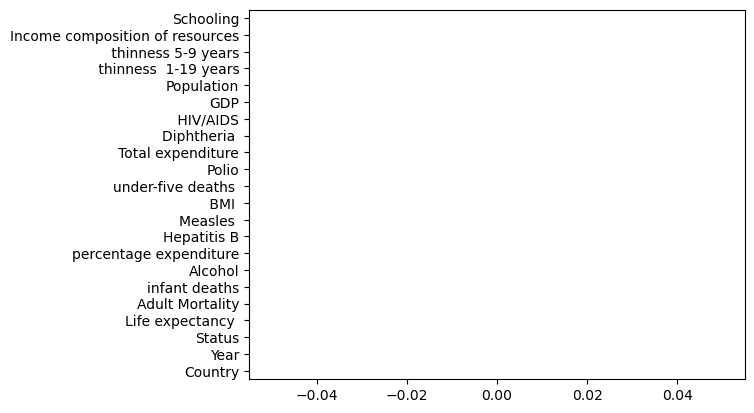

In [13]:
df.isnull().sum().plot(kind= 'barh')
plt.show()

In [14]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015.0,1,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014.0,1,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013.0,1,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012.0,1,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011.0,1,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [15]:
# Preventing Data Leakage

# Step 01: Split the dataset in X and y
# Where X: Independent Column and y: Dependent Column : Target column
X = df.drop(columns = ['Country','Population','Life expectancy '],axis = 1)
y = df['Life expectancy '] # target column
# Step 02: Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
# Step 03: Scale the data
scaler = RobustScaler() 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
from sklearn.ensemble import RandomForestRegressor
#Importing Metrics for Regression Model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor().fit(X_train,y_train)
y_pred_RF = RF.predict(X_test)

print('The Model Accuracy for Random Forest', r2_score(y_test,y_pred_RF))

The Model Accuracy for Random Forest 0.9608280122604665


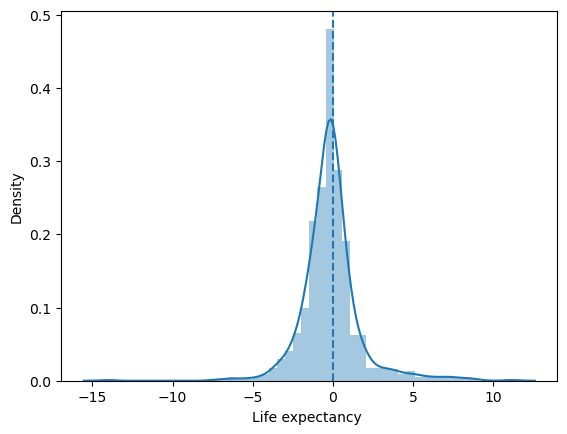

In [17]:
sns.distplot(y_test-y_pred_RF)
plt.axvline(0, linestyle = "--")

In [18]:
!pip install catboost

from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

# Initialize and fit the model
cat_model = CatBoostRegressor(verbose=0).fit(X_train, y_train) # Set verbose to 0 to suppress training output


# Predict on test set
y_pred_cat = cat_model.predict(X_test)

# Evaluate model accuracy
print('The Model Accuracy for CatBoost:', r2_score(y_test, y_pred_cat))

Defaulting to user installation because normal site-packages is not writeable
The Model Accuracy for CatBoost: 0.9663696195274397


In [19]:
#Using AdaBoosting ALgorithm
from sklearn.ensemble import AdaBoostRegressor
ADAB = AdaBoostRegressor().fit(X_train,y_train)
y_pred_ADAB = ADAB.predict(X_test)

print('Model Accuracy for AdaBoost Regressor', r2_score(y_test,y_pred_ADAB))

Model Accuracy for AdaBoost Regressor 0.9001676752844776


In [20]:
#Using XgBoost Algorithm
# pip install xgboost
import xgboost as xg

xgb = xg.XGBRegressor().fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

print('Model Accuracy for XGBoost Regressor', r2_score(y_test,y_pred_xgb))

Model Accuracy for XGBoost Regressor 0.9613593484873214


In [21]:
from sklearn.model_selection import RandomizedSearchCV

RF = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': [100, 200, 400, 500],
    'max_depth': [None, 10, 20, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # Removed 'auto'
}

random_search = RandomizedSearchCV(
    estimator=RF,
    param_distributions=param_dist,
    n_iter=50,
    cv=10,
    scoring='r2',
    n_jobs=-1,
    error_score='raise'  # Will raise exceptions immediately if any fit fails
)

#Fit to training data
random_search.fit(X_train,y_train)

#Best Model
best_rf = random_search.best_estimator_
print('Best Parameters:',random_search.best_params_)
print('Best R2 Score on CV:',random_search.best_score_*100)

Best Parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 20}
Best R2 Score on CV: 95.35221433892627


In [22]:
#Linear Reg Models:
'''
Lasso(L2), Linear, Ridge(L1), ElasticNet(L1&L2), Huber Regressor, Ransac Regressor
1. Linear Regression
2. Lasso Regression
3. Ridge Regression
4. ElasticNet Regression
5. Huber Regressor
6. RANSAC Regressor

When model is underfitting, use Linear Regression
XGBoost, CatBoost, AdaBoost, Random Forest, and other ensemble methods are used for complex models
when model is overfitting, use Lasso and Ridge(L1 or L2) regularization

'''

'\nLasso(L2), Linear, Ridge(L1), ElasticNet(L1&L2), Huber Regressor, Ransac Regressor\n1. Linear Regression\n2. Lasso Regression\n3. Ridge Regression\n4. ElasticNet Regression\n5. Huber Regressor\n6. RANSAC Regressor\n\nWhen model is underfitting, use Linear Regression\nXGBoost, CatBoost, AdaBoost, Random Forest, and other ensemble methods are used for complex models\nwhen model is overfitting, use Lasso and Ridge(L1 or L2) regularization\n\n'

In [23]:
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import r2_score

# Initialize and fit the model
huber = HuberRegressor( epsilon=1.35, max_iter=100, alpha=0.0001, warm_start=False, fit_intercept=True, tol=1e-05)
huber.fit(X_train, y_train)

# Predict and evaluate
y_pred_huber = huber.predict(X_test)
print('The Model Accuracy for Huber Regressor:', r2_score(y_test, y_pred_huber))


The Model Accuracy for Huber Regressor: 0.6870923859674063


In [24]:
# from sklearn.linear_model import RANSACRegressor, LinearRegression
# from sklearn.metrics import r2_score

# # Use a base regressor like LinearRegression
# ransac = RANSACRegressor(base_estimator=LinearRegression())
# ransac.fit(X_train, y_train)

# # Predict and evaluate
# y_pred_ransac = ransac.predict(X_test)
# print('The Model Accuracy for RANSAC Regressor:', r2_score(y_test, y_pred_ransac))


In [25]:
#Applying those parameters on the xgboost model
import xgboost as xg

xgb = xg.XGBRegressor(
    subsample=0.6,
    reg_lambda=0.5,
    reg_alpha=0,
    n_estimators=300,
    min_child_weight=4,
    max_depth=5,
    learning_rate=0.05,
    gamma=0.3,
    colsample_bytree=0.7,
    random_state=42,
)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
print('Model Accuracy for XGBoost Regressor with the Hyperparameters:', r2_score(y_test, y_pred_xgb)*100)

Model Accuracy for XGBoost Regressor with the Hyperparameters: 96.62646614598859


In [26]:
from sklearn.model_selection import RandomizedSearchCV

XGB = xg.XGBRegressor(random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 2, 3, 4],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0.1, 0.5, 1, 2]
}

random_search = RandomizedSearchCV(
    estimator=XGB,
    param_distributions=param_dist,
    n_iter=50,              
    scoring='r2',
    cv=5,                   
    random_state=42,
    n_jobs=-1               
)
random_search.fit(X_train,y_train)

best_rf = random_search.best_estimator_
print('Best Parameters:',random_search.best_params_)
print('Best R2 Score on CV:',random_search.best_score_*100)

Best Parameters: {'subsample': 0.7, 'reg_lambda': 0.1, 'reg_alpha': 0, 'n_estimators': 400, 'min_child_weight': 2, 'max_depth': 8, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.7}
Best R2 Score on CV: 96.01382771344397


In [29]:
RF.feature_importances_

array([8.25936724e-03, 2.31673595e-04, 1.25618178e-01, 5.71084408e-03,
       8.85010801e-03, 3.46896285e-03, 2.04681848e-03, 3.59396379e-03,
       3.22591083e-02, 1.04565101e-02, 3.40032232e-03, 6.17597358e-03,
       2.88627030e-03, 5.86105503e-01, 4.12765296e-03, 5.75295314e-03,
       1.01505030e-02, 1.68744369e-01, 1.21609187e-02])

In [ ]:
df.columns

In [30]:
df = df[['Country', 'Year', 'Status', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Life expectancy ']]

<Axes: >

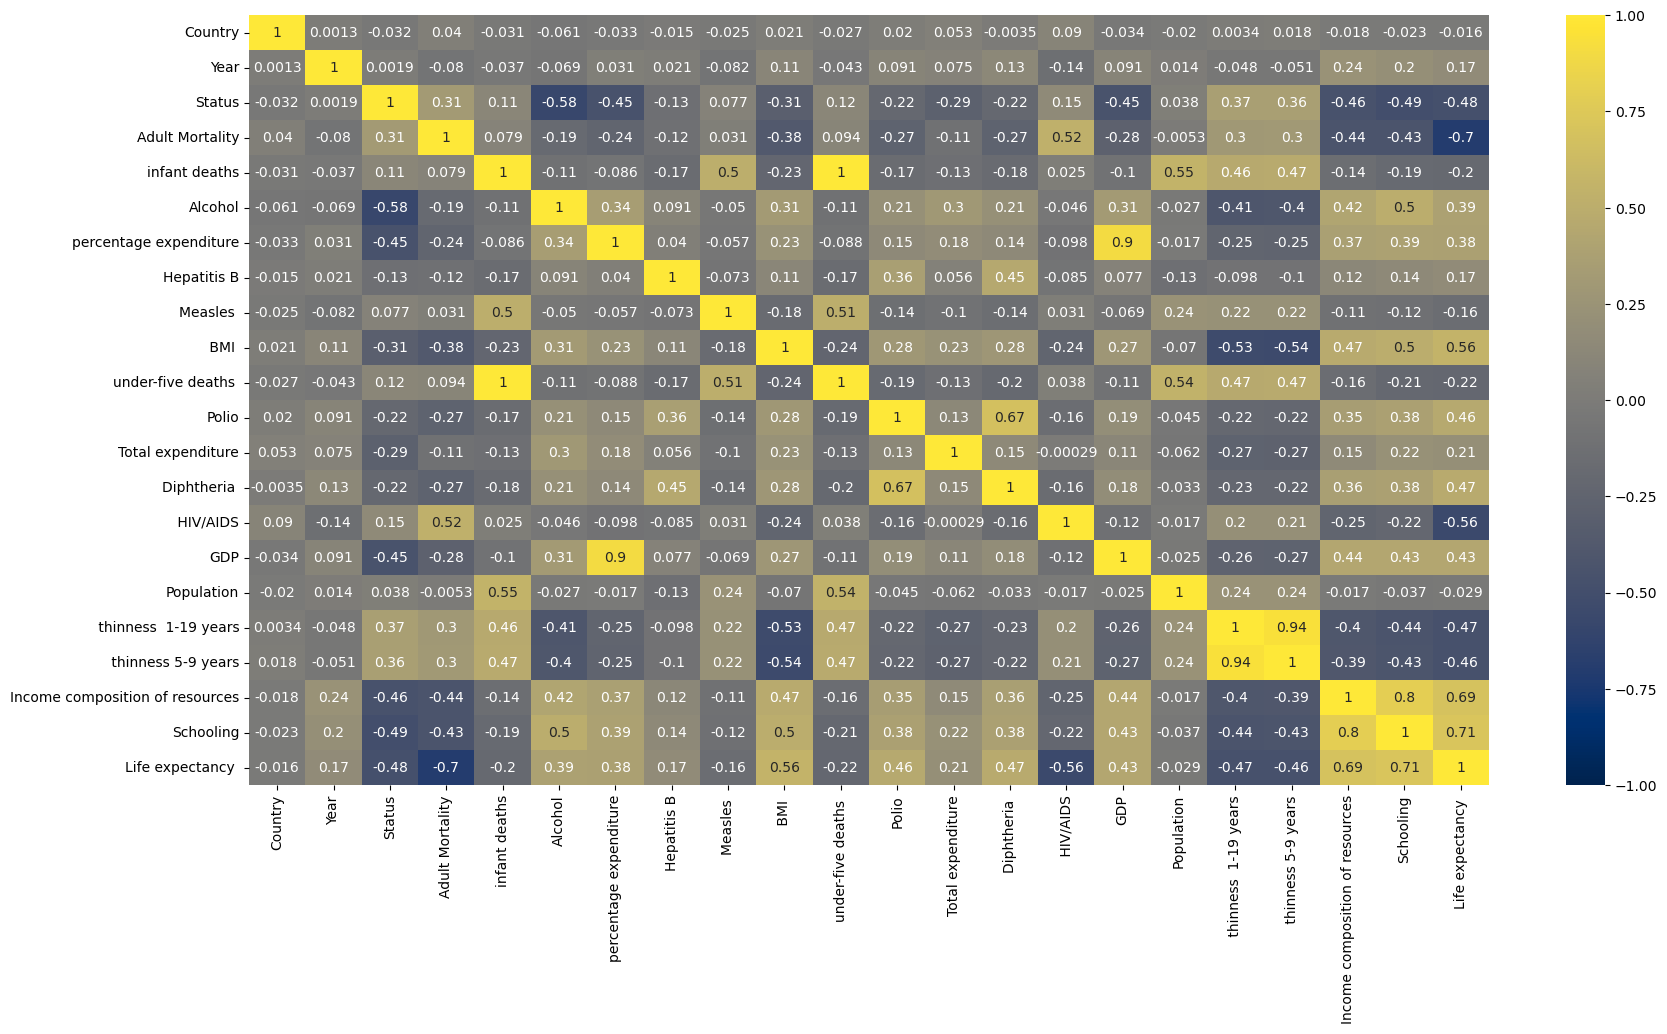

In [31]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, vmax=1, vmin=-1, center=0,cmap='cividis')